In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("sales_data.csv", parse_dates=["Date"])
df.head()

C:\Users\dev gola\AppData\Local\Temp\ipykernel_32076\4130702818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv("sales_data.csv", parse_dates=["Date"])


,OrderID,Product,Category,Quantity,Price,Region,Date
0,1,Laptop,Tech,2,60000,Delhi,2023-05-01
1,2,Phone,Tech,1,25000,Mumbai,2023-07-01
2,3,Chair,Furniture,4,3000,Bangalore,2023-10-02
3,4,Mouse,Accessories,3,800,Delhi,2023-02-15
4,5,Tablet,Tech,1,20000,Chennai,2023-01-03


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   OrderID   8 non-null      int64         
 1   Product   8 non-null      object        
 2   Category  8 non-null      object        
 3   Quantity  8 non-null      int64         
 4   Price     8 non-null      int64         
 5   Region    8 non-null      object        
 6   Date      8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 576.0+ bytes


,OrderID,Quantity,Price
count,8.00000,8.000000,8.000000
mean,4.50000,2.000000,17225.000000
std,2.44949,1.069045,19398.214204
min,1.00000,1.000000,800.000000
25%,2.75000,1.000000,2750.000000
50%,4.50000,2.000000,13500.000000
75%,6.25000,2.250000,21250.000000
max,8.00000,4.000000,60000.000000


In [4]:
df["Revenue"] = df["Quantity"] * df["Price"]
df.head()

,OrderID,Product,Category,Quantity,Price,Region,Date,Revenue
0,1,Laptop,Tech,2,60000,Delhi,2023-05-01,120000
1,2,Phone,Tech,1,25000,Mumbai,2023-07-01,25000
2,3,Chair,Furniture,4,3000,Bangalore,2023-10-02,12000
3,4,Mouse,Accessories,3,800,Delhi,2023-02-15,2400
4,5,Tablet,Tech,1,20000,Chennai,2023-01-03,20000


In [6]:
print("Total Revenue:", df["Revenue"].sum())
print("Total Orders:", df["OrderID"].nunique())
print("Average Revenue per Order:", df.groupby("OrderID")["Revenue"].sum().mean())

Total Revenue: 225400
Total Orders: 8
Average Revenue per Order: 28175.0


Product
Laptop        120000
Monitor        30000
Phone          25000
Tablet         20000
Chair          12000
Table          12000
Headphones      4000
Mouse           2400
Name: Revenue, dtype: int64


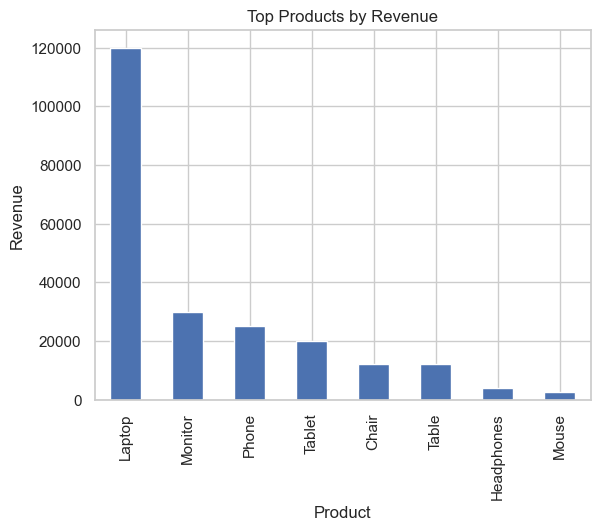

In [7]:
top_products = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)
print(top_products)

top_products.plot(kind="bar")
plt.title("Top Products by Revenue")
plt.ylabel("Revenue")
plt.show()

Region
Delhi        152400
Mumbai        37000
Chennai       20000
Bangalore     12000
Hyderabad      4000
Name: Revenue, dtype: int64


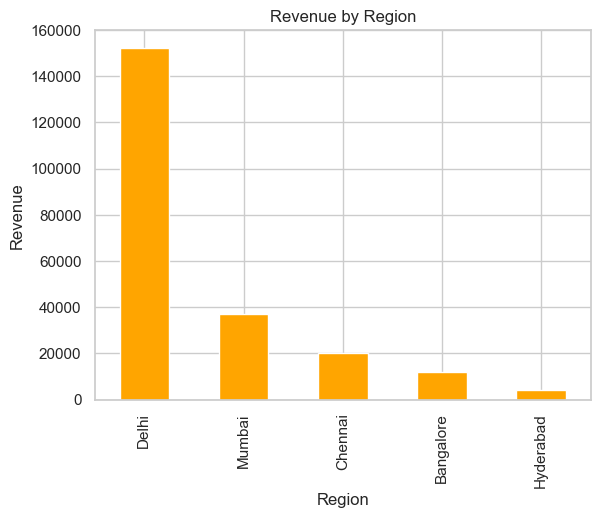

In [8]:
region_sales = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)
print(region_sales)

region_sales.plot(kind="bar", color="orange")
plt.title("Revenue by Region")
plt.ylabel("Revenue")
plt.show()

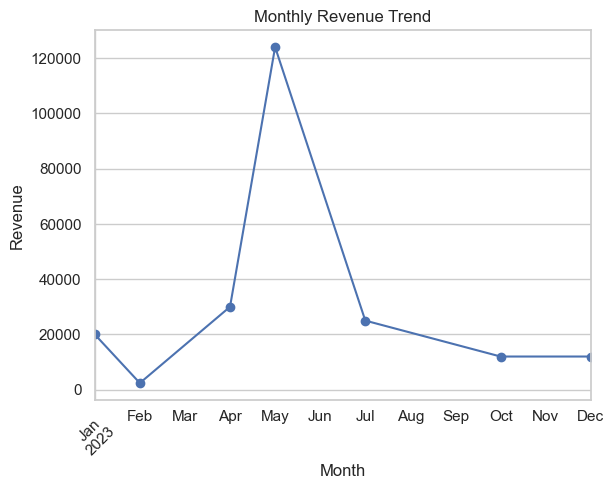

In [9]:
df["Month"] = df["Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Revenue"].sum()

monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()